In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('/Users/woojinheo/Desktop/github/SHAP/data/train.csv', index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [7]:
for col in df.columns:
    if df[col].dtype==object:
        print('\n',df[col].value_counts(normalize=True))


 Gender
Female    0.507459
Male      0.492541
Name: proportion, dtype: float64

 Customer Type
Loyal Customer       0.817322
disloyal Customer    0.182678
Name: proportion, dtype: float64

 Type of Travel
Business travel    0.689627
Personal Travel    0.310373
Name: proportion, dtype: float64

 Class
Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: proportion, dtype: float64

 satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64


In [8]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# catboost

In [81]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load
X = df.drop(columns=['id','satisfaction'], axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, cat_features=categorical_columns)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

# prediction
y_pred = model.predict(X_test)

# accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

0:	learn: 0.5632331	test: 0.5633677	best: 0.5633677 (0)	total: 13.4ms	remaining: 1.32s
10:	learn: 0.2003078	test: 0.1976925	best: 0.1976925 (10)	total: 131ms	remaining: 1.06s
20:	learn: 0.1577266	test: 0.1552823	best: 0.1552823 (20)	total: 244ms	remaining: 920ms
30:	learn: 0.1351605	test: 0.1332931	best: 0.1332931 (30)	total: 355ms	remaining: 790ms
40:	learn: 0.1226877	test: 0.1218625	best: 0.1218625 (40)	total: 464ms	remaining: 668ms
50:	learn: 0.1149937	test: 0.1147042	best: 0.1147042 (50)	total: 574ms	remaining: 552ms
60:	learn: 0.1076098	test: 0.1079700	best: 0.1079700 (60)	total: 682ms	remaining: 436ms
70:	learn: 0.1038794	test: 0.1046653	best: 0.1046653 (70)	total: 793ms	remaining: 324ms
80:	learn: 0.1010539	test: 0.1022991	best: 0.1022991 (80)	total: 912ms	remaining: 214ms
90:	learn: 0.0987821	test: 0.1003374	best: 0.1003374 (90)	total: 1.03s	remaining: 102ms
99:	learn: 0.0967031	test: 0.0988459	best: 0.0988459 (99)	total: 1.15s	remaining: 0us

bestTest = 0.09884588624
bestItera

In [82]:
import pickle

# # save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/catboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# load model
# with open('/Users/woojinheo/Desktop/github/SHAP/models/catboost_model.pkl', 'rb') as file:
#     model = pickle.load(file)


In [83]:
# cat boost explainer - feature importance
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Inflight wifi service,27.835135
1,Type of Travel,24.933603
2,Online boarding,8.503323
3,Customer Type,8.453486
4,Checkin service,4.443225
5,Gate location,3.523078
6,Class,3.458934
7,Baggage handling,3.398063
8,Seat comfort,3.215397
9,Inflight entertainment,2.887562


# decision tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
# Encode categorical features
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_ = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Target column transformation
df_['satisfaction'] = df_['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1})

In [89]:
# data load
X = df_.drop(columns=['id','satisfaction'], axis=1)
y = df_['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# model train
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# prediction
y_pred = dt_model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [116]:
# # save model
with open('/Users/woojinheo/Desktop/github/SHAP/models/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

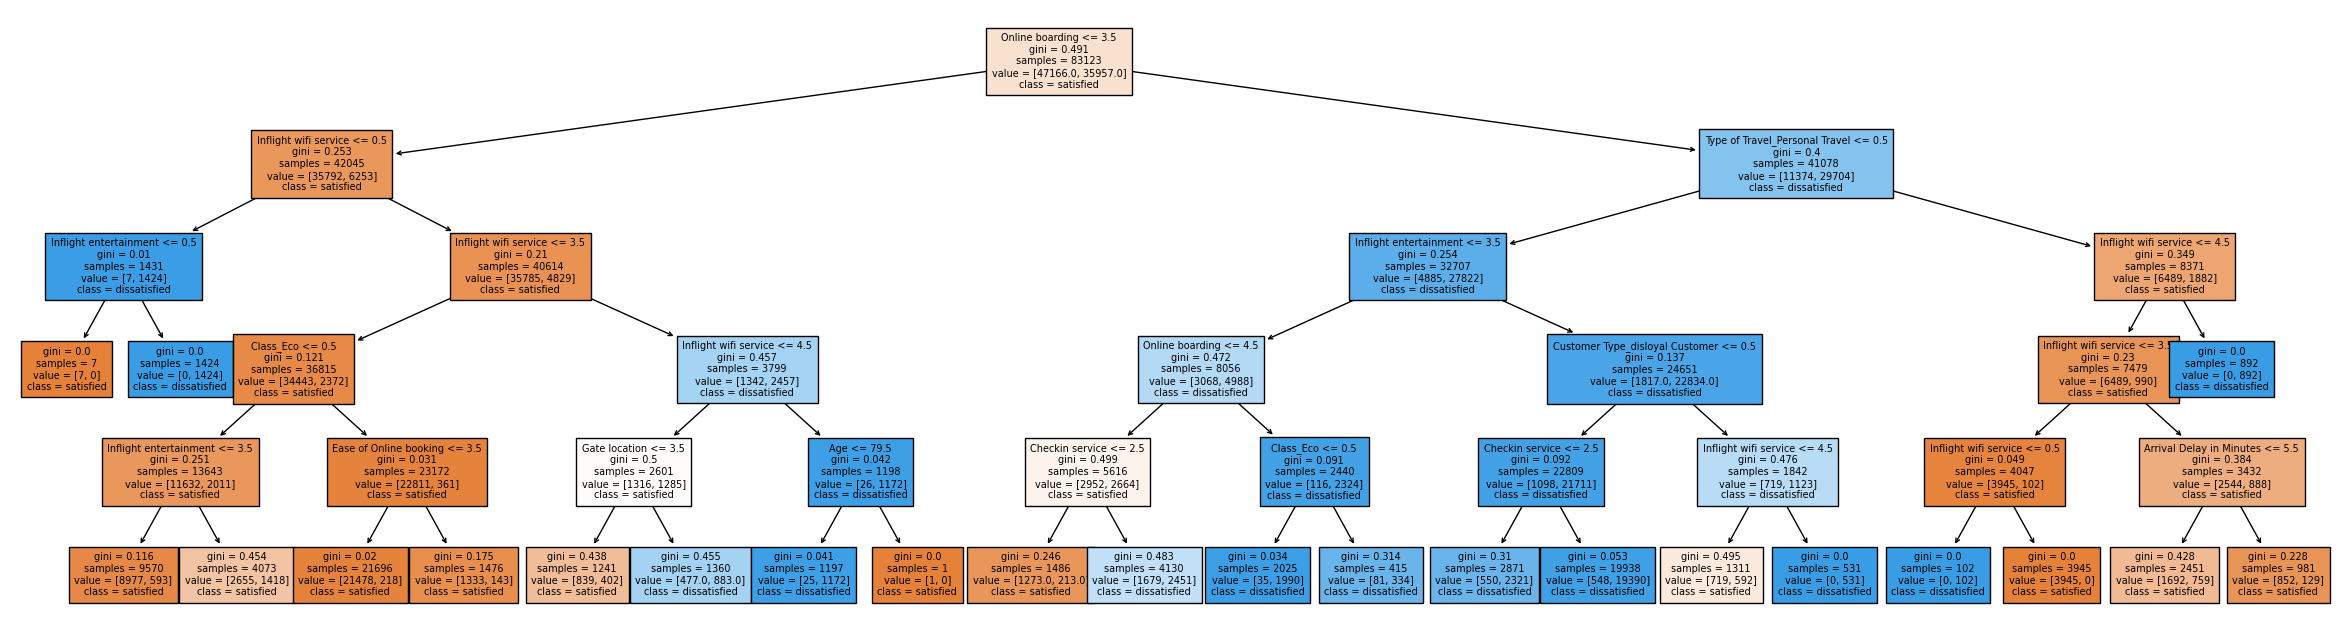

In [115]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Decision Tree visualization
plt.figure(figsize=(30, 8))
plot_tree(dt_model, feature_names=X.columns.tolist(), class_names=['satisfied','dissatisfied'], filled=True, fontsize=7)
plt.show()

# SHAP

In [ ]:
# import shap
# shap.initjs()

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

- SHAP global explainer

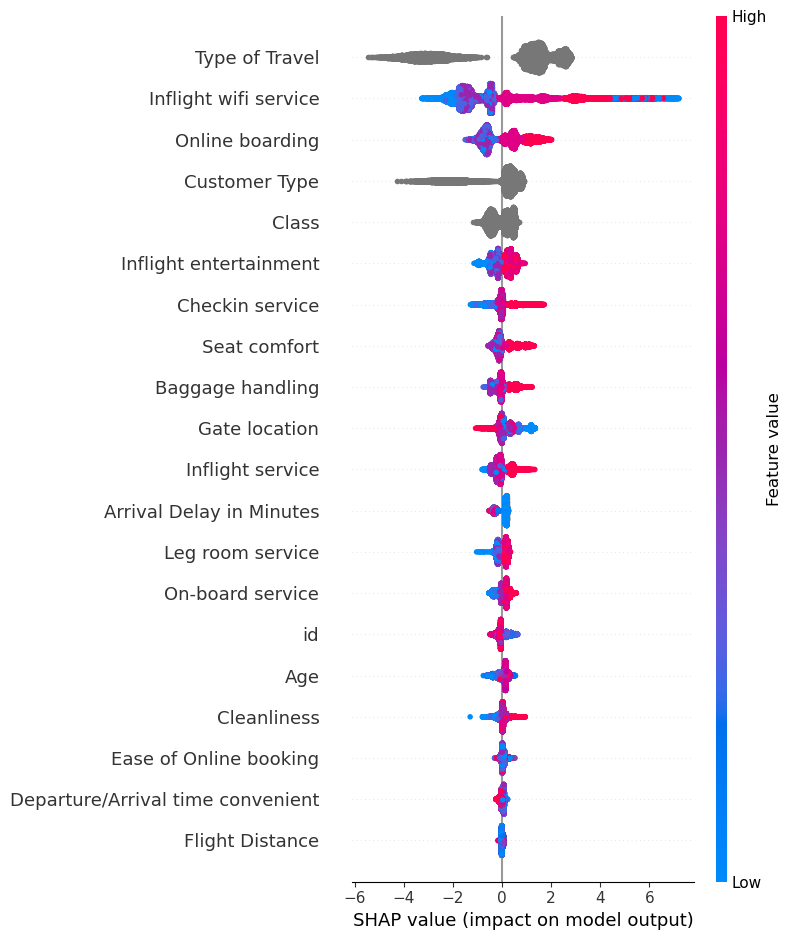

In [ ]:
shap.summary_plot(shap_values, X_test)

- SHAP local explainer

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

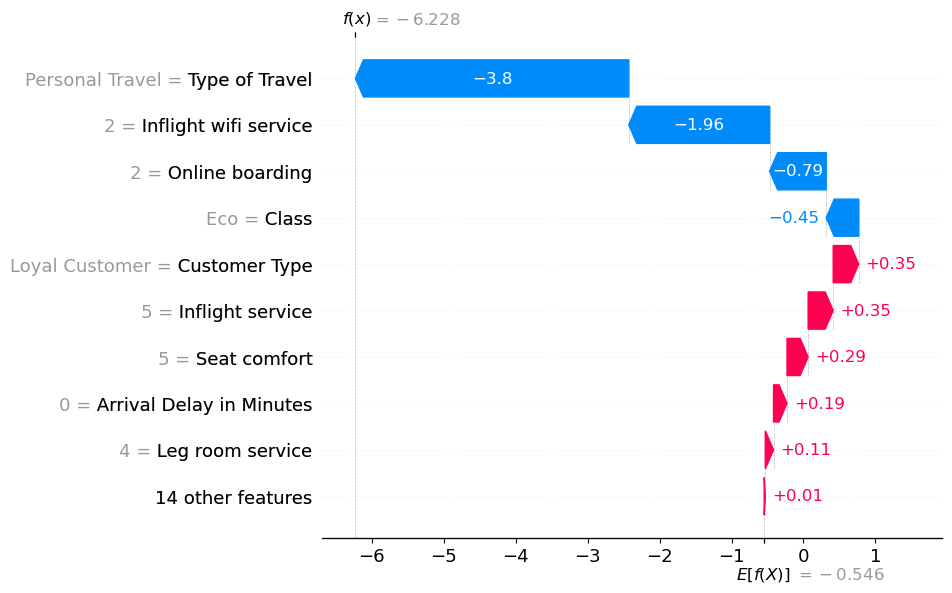

In [ ]:
# individual data point SHAP value Waterfall Plot
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))